# Визуализация
## 2.1 Кластеризация данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data=pd.read_csv("data/data2.csv")
data=data.drop(["Unnamed: 0", "extra"], axis=1)
data.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,recipient,author,content,абдулгалеевзт,абдулганиевфс,абдуллазяновэю,абдуллинам,аблязовка,абязоваюа,агеевшр,...,ялтинском,ялтинскому,ямедовой,янао,янв,январе,января,янтарной,ярославль,ярославская
0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Разделение выборки на обучающую и тестовую

In [3]:
df=pd.read_excel("data/data.xlsx")
df.columns=["id", "no", "date", "origin_date", "recipient", "author", "content", "extra"]
content=df['content']
df=df.drop(['id','no','date','origin_date','extra','content'], axis=1)
from sklearn.feature_extraction.text import CountVectorizer as CV
vectorizer=CV(max_df=0.5, min_df=0.001, ngram_range=(2,2),stop_words=['стандартам', 'акта', 'участие', 'участии', 'актов', 'ii','iii','iv','vi','vii','v','00', 'во', 'год', 'года', 'вопросу', 'г', 'd1', 'гг', 'о', 'об', 'по', 'для', 'на', 'до', 'из', '0001', '001', '0020', '00321', '00366', '006', '01', '02', '03', '04', '043', '05', '05пр', '06', '062', '06g', '06пр', '07', '073', '074', '08', '09', '0900д', '10', '100', '1030', '104', '10584', '1065', '11', '1187', '119', '12', '120', '125', '1265', '13', '137', '14', '140', '141', '1426', '1455', '147', '1497', '15', '1551', '16', '17', '170315019', '170526050', '1723', '178', '17г', '18', '1849', '188', '189', '19', '1921', '194', '1942', '1968', '1f3', '1б', '1в', '1г', '1го', '1ж', '1с', '20', '200', '20118', '2015', '2016', '2016г', '2017', '2017г', '2017гг', '2018', '20185г', '2018г', '2019', '2019г', '2019гг', '202', '2020', '2021', '2021г', '2021гг', '2022', '2024', '2024г', '2025', '2030', '2035', '2073', '2075', '209', '20пр', '21', '210', '216', '2160', '217', '218', '22', '22017', '2220', '2225', '2249', '226', '228', '23', '230', '2323', '234', '2343', '24', '2429', '2494', '25', '2550', '2582', '2585', '26', '2603', '2604', '2605', '2606', '261', '262', '263', '265', '2679', '27', '273', '278', '279', '27февраля', '28', '286', '289', '29', '295', '298', '299', '2996818', '2а', '2б', '30', '300', '300579', '301', '30107', '306', '30пр', '31', '3100', '32', '321гс', '3259', '326', '328', '33', '332', '3372', '33с', '342', '349', '35', '3510', '36', '37', '372', '3751р', '37680', '38', '3857', '39', '3995', '3d', '3dld', '3и12', '3х', '404', '4060', '408', '42', '423', '425', '42548', '436', '437', '438', '45', '456', '46', '4600037832', '47', '486', '49', '4919п', '496', '50', '5000', '506', '51', '52', '52пр', '53', '58', '580', '58199', '59657', '598', '60', '61884', '625', '63', '63611', '638', '64392', '65', '652', '65935', '6629', '671', '677', '69', '690', '694', '695', '6981', '701', '708', '709', '70пр', '710', '7115', '73', '7412', '7493', '75', '750', '762', '77', '770400207282', '7721', '791', '807', '83', '839', '84', '846', '85', '869', '88', '89', '901', '91', '911', '9504', '976', '____', '__________', '____________', '_____________', '________________', '_________________', '____________________', '______________________', '________________________', '_________________________', '__________________________', '_____________________________', '___________________________________', '_____________________________________', '_______________________________________', '____________________________________________', '_____________________________________________', '_о', 'about'])
vectors=vectorizer.fit_transform(content)
vectorizer.vocabulary_
vecs_df=pd.DataFrame(vectors.toarray())
vecs_df.columns=vectorizer.get_feature_names()
vecs_df

,competition казани,euroskills competition,euroskills санкт,futureskills мировом,hi tech,logisticskills пленарном,russia повторное,russia субъекте,russia форум,worldskills competition,...,экономического форума,экономическом форуме,эксперта компатриота,эксперта компетенции,экспертного совета,экспертной группы,экспертный совет,электромонтажу worldskills,этапа конкурса,этапе конкурса
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Функция сброса целевого атрибута
Для потенциального построения ансамбля из регрессоров, лучше вернуть target-поле в первозданный вид, но удалить из него поля с несколькими значениями

In [4]:
def dropMultiValues(inp):
    if (str(inp).find("\n")!=-1):
        return None
    return inp

In [5]:
df2=df
df2['recipient']=df2['recipient'].apply(dropMultiValues)
df2=df2.dropna()
df2

,recipient,author
0,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»)
1,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...
2,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области)
3,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...
4,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...
...,...,...
4962,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...
4963,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...
4964,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...
4965,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...


In [6]:
def getBracketContent(inp):
    pos=inp.find('(')
    if (pos==-1):
        return inp
    return inp[pos+1:len(inp)-1]

def getBeforeBracket(inp):
    pos=inp.find('(')
    if (pos==-1):
        return inp
    if (inp.find('инистерство')==-1):
        return inp[:pos-1]
    return None

authors=df['author'].apply(getBeforeBracket)
orgs=df['author'].apply(getBracketContent)

In [7]:
df_res=pd.concat([df2,pd.DataFrame(authors),pd.DataFrame(orgs)], axis=1)
df_res.columns=["recipient", "authors", "author","organization"]
df_res=pd.concat([df_res, vecs_df], axis=1)
df_res=df_res.drop(['authors'], axis=1).dropna().reset_index().drop(['index'], axis=1)
df_res

,recipient,author,organization,competition казани,euroskills competition,euroskills санкт,futureskills мировом,hi tech,logisticskills пленарном,russia повторное,...,экономического форума,экономическом форуме,эксперта компатриота,эксперта компетенции,экспертного совета,экспертной группы,экспертный совет,электромонтажу worldskills,этапа конкурса,этапе конкурса
0,Уразов Р.Н.,Антонова С.В.,АО «Интерфакс»,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Уразов Р.Н.,Цивилев С.Е.,Администрация Кемеровской области,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Уразов Р.Н.,Атанов И.В.,Ставропольский государственный аграрный универ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Миронова С.В.,Островский А.В.,Губернатор Смоленской области,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Тымчиков А.Ю.,Соппа И.В.,"ФГБОУ ВО ""Московский политехнический университет""",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,Уразов Р.Н.,Райдер А.В.,Департамент образования и науки Администрации ...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3356,Уразов Р.Н.,Аршабеков Н.,НАО Холдинг Касипкор Республики Казахстан,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3357,Уразов Р.Н.,Зеленцова Е.В.,"Фонд ""Сколково""",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3358,Уразов Р.Н.,Запруднова Е.В.,Администрация Владимирской области,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Разделение выборки

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#random_state=1 для возможности воспроизведения результатов обучения модели при перекомпиляции
x=df_res.drop(['recipient'], axis=1)
y=df_res['recipient']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=1)

Загрузим две выборки в файлы

In [10]:
test_df=pd.concat([y_test,x_test], axis=1)
train_df=pd.concat([y_train,x_train], axis=1)
test_df.to_csv("test_data.csv")
train_df.to_csv("train_data.csv")

## 2.2 Визуализация зависимостей фич датасета

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

### Визуализация зависимостей в появлении биграмм в тексте

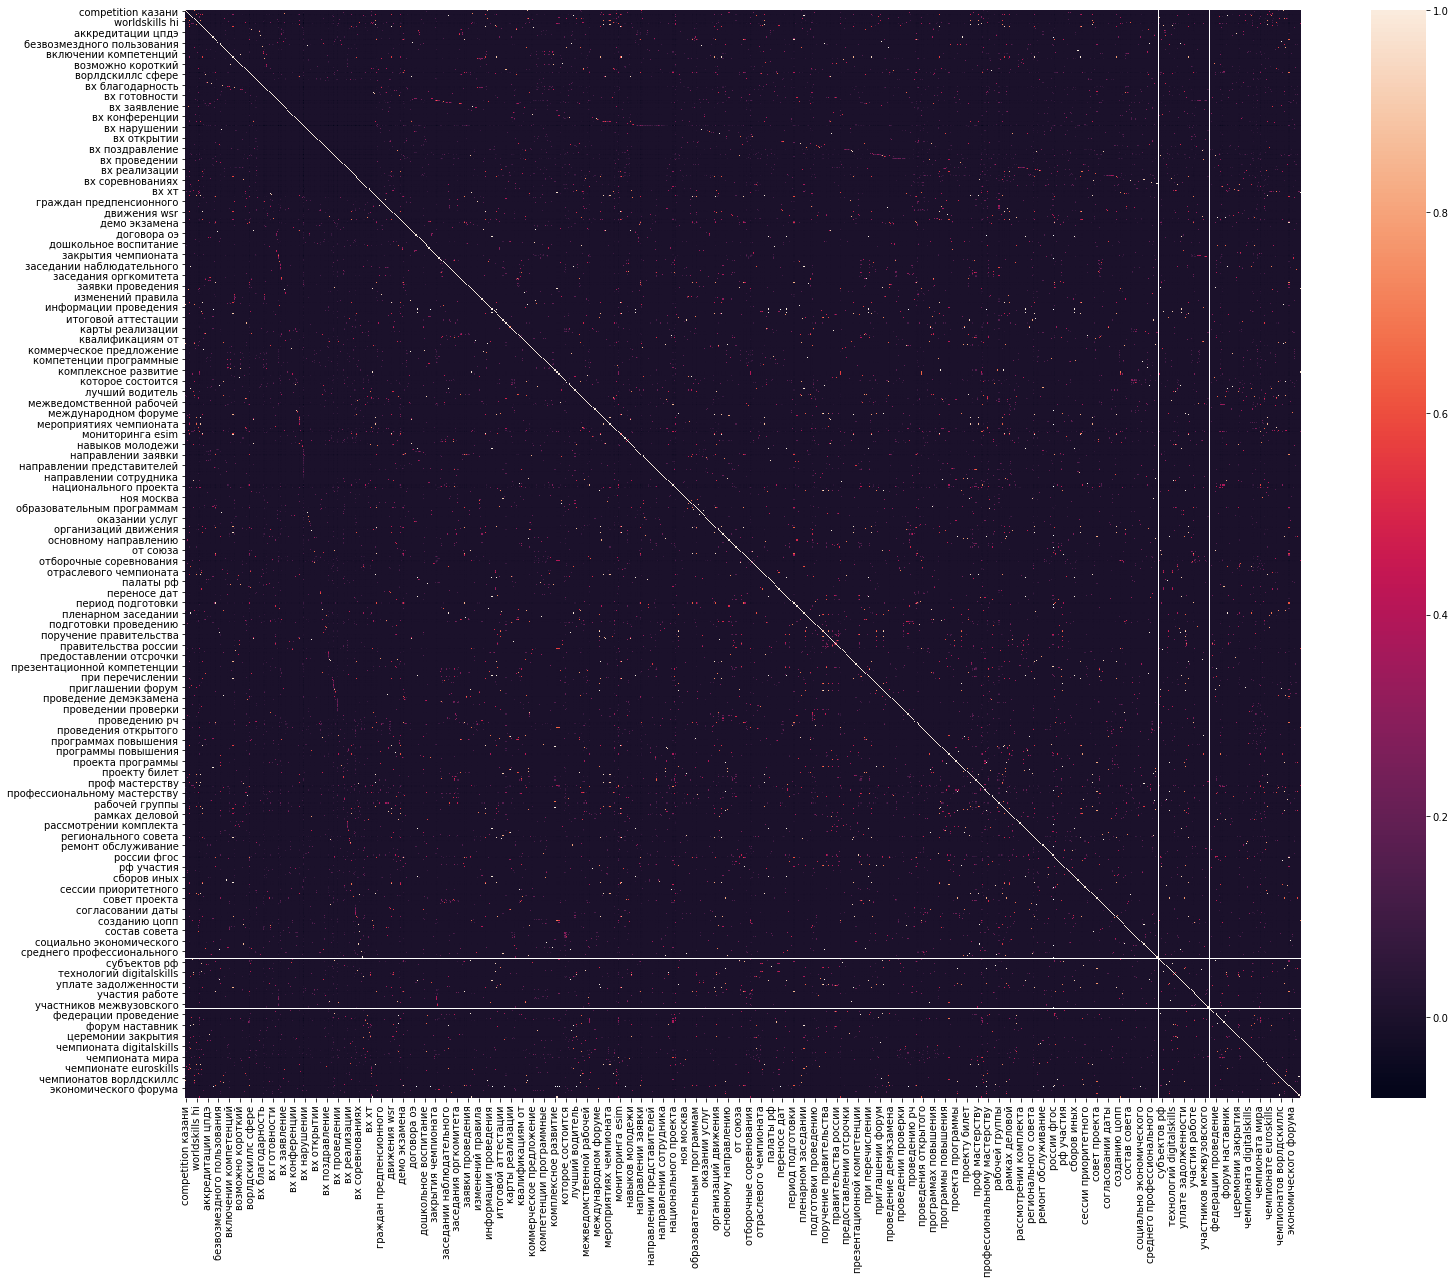

In [12]:
plt.figure(figsize=(25,20))
graphic=sb.heatmap(data=df_res.corr())

In [13]:
df_res.groupby(['recipient']).mean()

,competition казани,euroskills competition,euroskills санкт,futureskills мировом,hi tech,logisticskills пленарном,russia повторное,russia субъекте,russia форум,worldskills competition,...,экономического форума,экономическом форуме,эксперта компатриота,эксперта компетенции,экспертного совета,экспертной группы,экспертный совет,электромонтажу worldskills,этапа конкурса,этапе конкурса
recipient,,,,,,,,,,,,,,,,,,,,,
Абдуллин А.М.,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Алимов А.А.,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Антонов Ю.В.,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Артемова Т.В.,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Аштаева К.Д.,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Уразов Р.Н.,0.003319,0.001106,0.002212,0.0,0.009956,0.0,0.0,0.0,0.0,0.005531,...,0.003319,0.009956,0.0,0.001106,0.003319,0.002212,0.0,0.0,0.0,0.0
Уфимцев Д.А.,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Федосеев А.И.,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='recipient'>

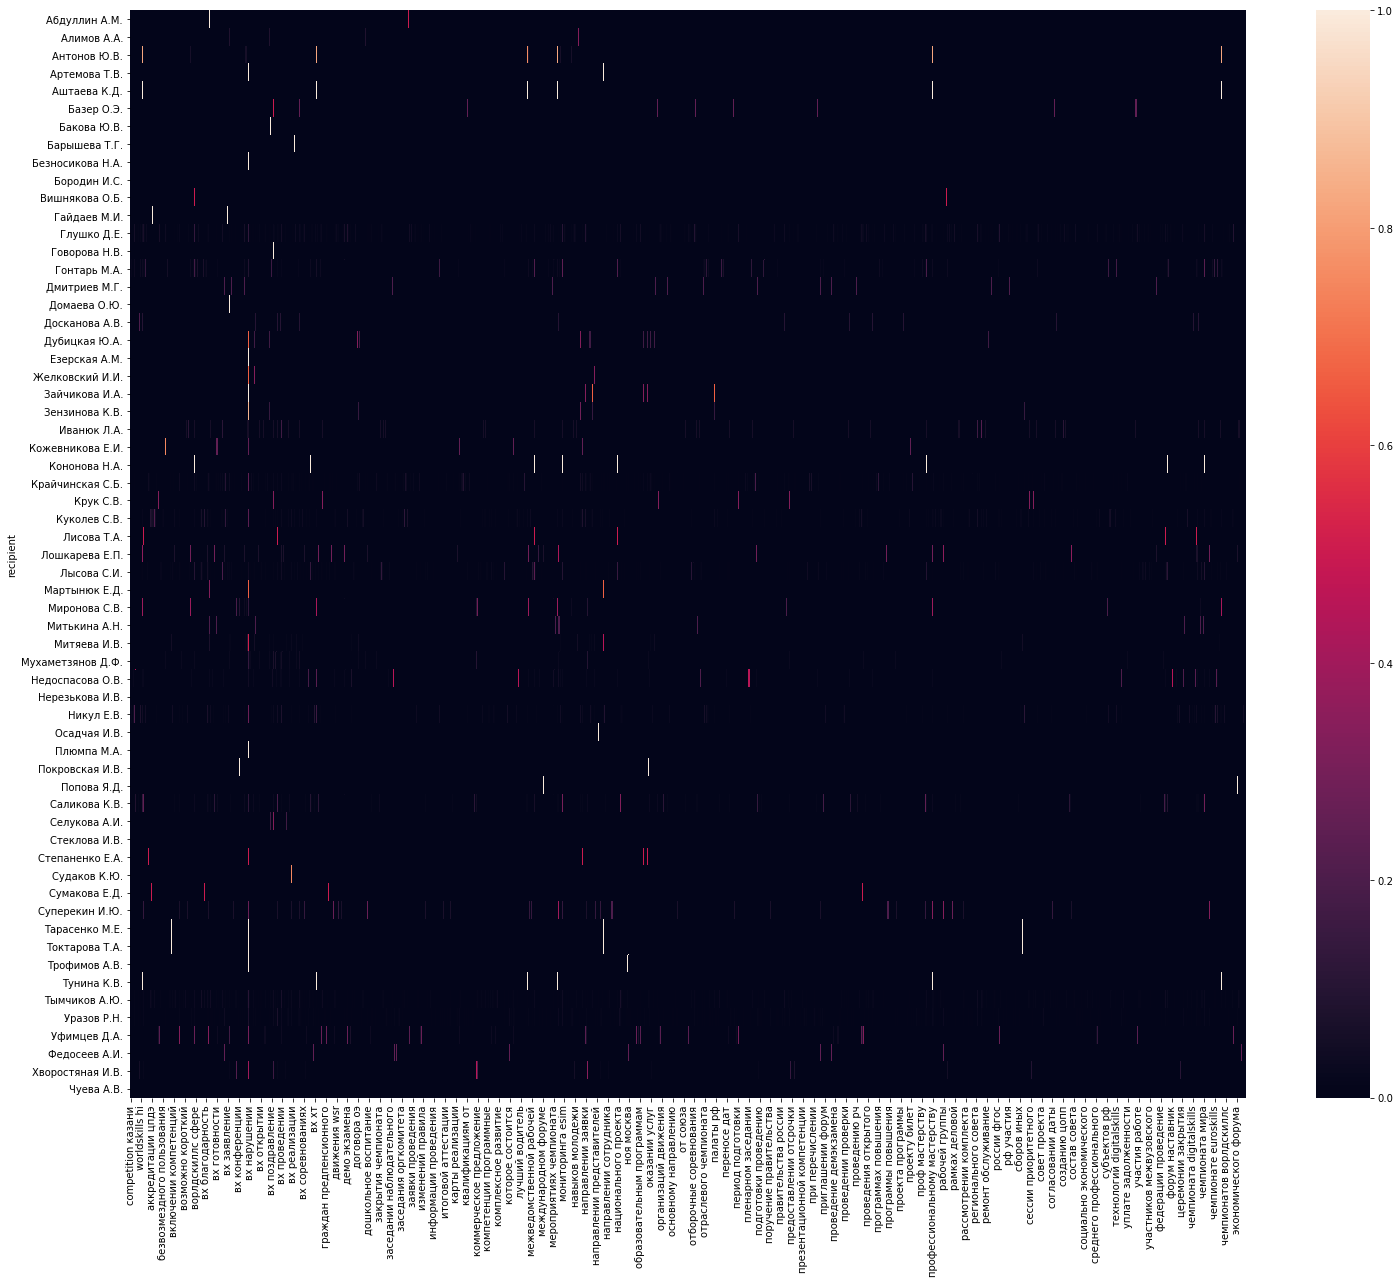

In [14]:
plt.figure(figsize=(25,20))
sb.heatmap(df_res.groupby(['recipient']).mean())

In [15]:
df_res.to_csv("data.csv")